<h1><center>Handwritten Digits Recognition using Neural Networks

### **Sharimbaev Batyr, BSc**
#### 05/03/2023

## **Results**:

**Train set**: 98.31% accuracy

**Test set**: 97.59% accuracy

**Validation set**: 97.77% accuracy

# Introduction

**Handwritten digit recognition** is a process of recognizing and classifying digits written by hand into their corresponding numerical values using machine learning algorithms. The process involves training a computer model on a large dataset of handwritten digits with their corresponding labels. Once trained, the model can predict the numerical value of new handwritten digits by analyzing the pattern of pixels in the image.

There are various machine learning algorithms that can be used for handwritten digit recognition, such as artificial neural networks, support vector machines, and decision trees. These algorithms work by extracting features from the handwritten digit images and then using these features to classify the digits into their respective numerical values.

**Keras** is a high-level open-source neural network library written in Python. It provides a user-friendly and modular interface for building, training, and deploying deep learning models. Keras can run on top of several lower-level deep learning libraries, such as TensorFlow, Theano, and CNTK, and it offers a consistent API across these backends.

### Import libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split

# Data preparation

In [6]:
# load the data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
# length of training set
len(X_train)

60000

In [8]:
# length of testing set
len(X_test)

10000

In [9]:
# shape of single image
X_train[0].shape

(28, 28)

Label of the image:  5


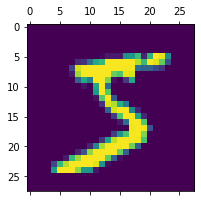

In [10]:
# visualising the image and looking at the label.
print("Label of the image: ", y_train[0])
plt.figure(figsize=(3, 3))
plt.matshow(X_train[0], fignum=1)
plt.show()

In [11]:
# # Normalize the data
X_train = X_train / 255
X_test = X_test / 255

In [12]:
# Reshape image
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
# new flattened train shape
X_train_flattened.shape

(60000, 784)

### Build the model

In [38]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_flattened, y_train, validation_split = 0.1, epochs=5)

Epoch 1/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2948 - accuracy: 0.9154 - val_loss: 0.1395 - val_accuracy: 0.9628
Epoch 2/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1373 - accuracy: 0.9601 - val_loss: 0.1008 - val_accuracy: 0.9725
Epoch 3/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0947 - accuracy: 0.9721 - val_loss: 0.1032 - val_accuracy: 0.9682
Epoch 4/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0728 - accuracy: 0.9775 - val_loss: 0.0953 - val_accuracy: 0.9750
Epoch 5/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0571 - accuracy: 0.9831 - val_loss: 0.0822 - val_accuracy: 0.9777


In [39]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0802 - accuracy: 0.9759


[0.08020223677158356, 0.9758999943733215]

# Plot the loss and accuracy curves for training and validation sets

In [34]:
def plot_accuracy(history):

    # create accuracy plot
    plt.figure(figsize=(8, 5))
    plt.plot(history.history["accuracy"], color = "b", label="train accuracy")
    plt.plot(history.history["val_accuracy"], color = "g", label="validation accuracy")
    plt.xlabel("Epoch", size=14)
    plt.ylabel("Accuracy", size=14)
    plt.legend(loc="lower right")
    plt.title("Training and Validation accuracy", size=18)
    plt.show()

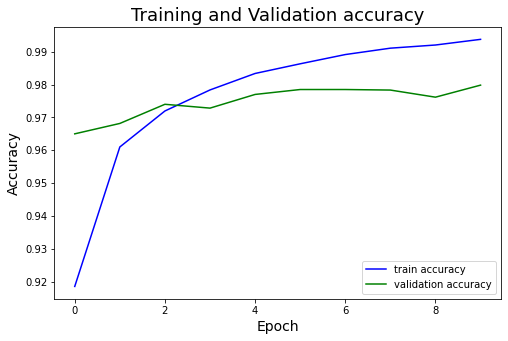

In [35]:
# plot accuracy
plot_accuracy(history)

In [36]:
def plot_error(history):

    # create error plot
    plt.figure(figsize=(8, 5))
    plt.plot(history.history["loss"], color = "b", label="train error")
    plt.plot(history.history["val_loss"], color = "g", label="validation error")
    plt.xlabel("Epoch", size=14)
    plt.ylabel("Loss", size=14)
    plt.legend(loc="upper right")
    plt.title("Training and Validation error", size=18)
    plt.show()

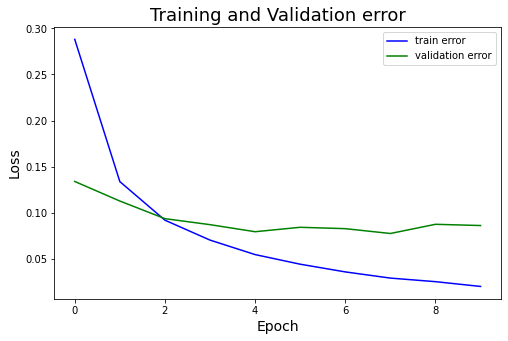

In [37]:
# plot error
plot_error(history)

# Confusion Matrix

313/313 [==============================] - 1s 3ms/step


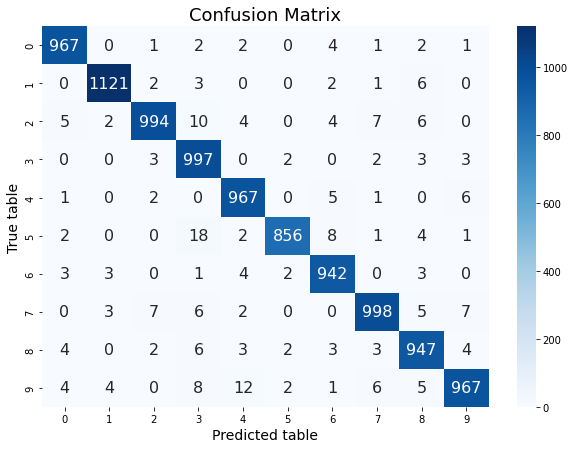

In [29]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap=plt.cm.Blues, fmt='d') 
plt.title("Confusion Matrix", size=18)
plt.xlabel('Predicted table', size=14)
plt.ylabel('True table', size=14)
plt.show()